In [ ]:
# ✅ Import Required Libraries
import pandas as pd
import numpy as np

# ✅ Load Dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
# ✅ Preview First 5 Rows
print(df.head())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
# ✅ Basic Info
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel    

In [ ]:
# ✅ Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

In [ ]:
# ✅ Summary Stats
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        6

In [ ]:
# ✅ Check for Duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


In [ ]:
# ✅ Drop duplicates if any
df = df.drop_duplicates()

In [ ]:
# ✅ Drop columns that add no value (e.g., EmployeeCount, Over18, StandardHours)
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace=True)

In [ ]:
# ✅ Convert categorical yes/no to binary
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})

In [ ]:
# ✅ Convert other object columns to category (optional but good for memory)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

# ✅ Confirm shape and columns
print(f"\nCleaned Data Shape: {df.shape}")
print("\nColumns after cleaning:")
print(df.columns)


Cleaned Data Shape: (1470, 31)

Columns after cleaning:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


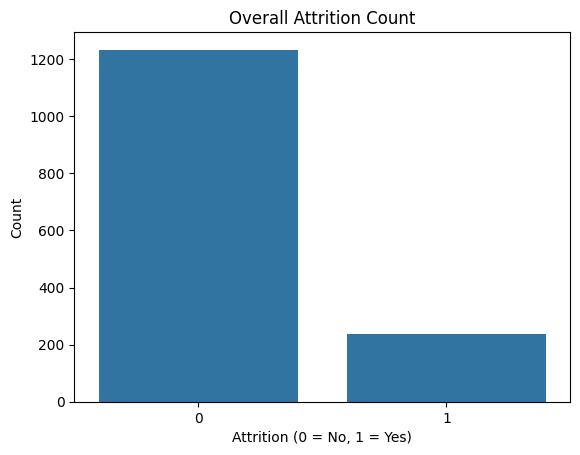

Overall Attrition Rate: 16.12%


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Overall Attrition Count
sns.countplot(data=df, x='Attrition')
plt.title("Overall Attrition Count")
plt.xlabel("Attrition (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Attrition Rate
attrition_rate = df['Attrition'].mean()
print(f"Overall Attrition Rate: {attrition_rate:.2%}")


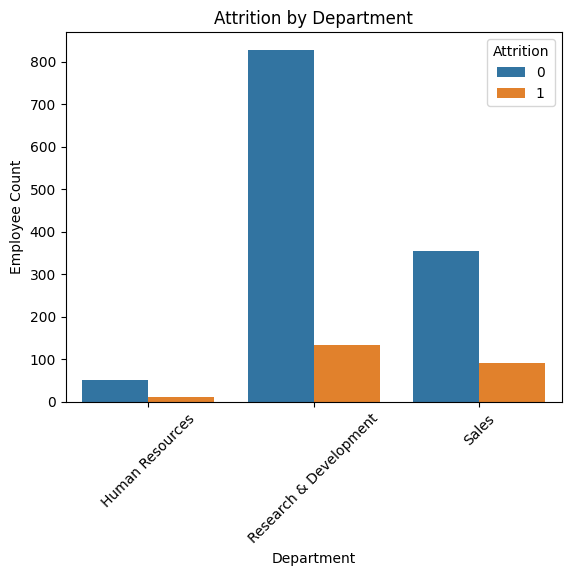

In [ ]:
# Countplot with Hue
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title("Attrition by Department")
plt.xticks(rotation=45)
plt.ylabel("Employee Count")
plt.show()


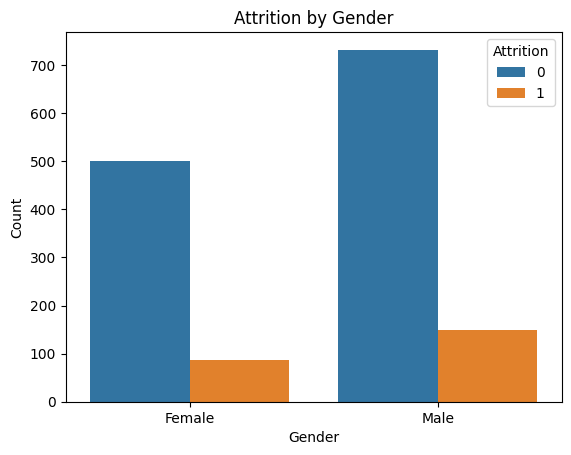

In [ ]:
sns.countplot(data=df, x='Gender', hue='Attrition')
plt.title("Attrition by Gender")
plt.ylabel("Count")
plt.show()


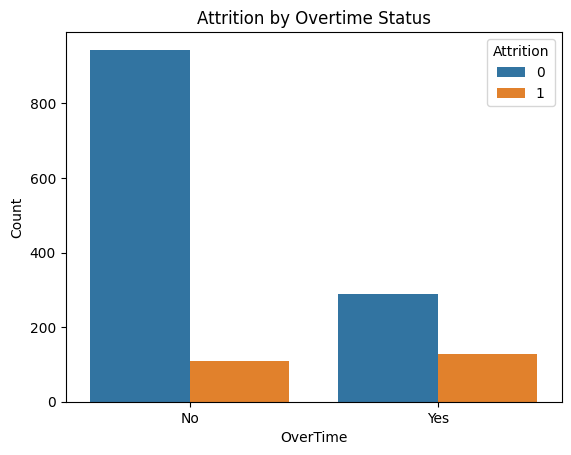

In [ ]:
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title("Attrition by Overtime Status")
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylabel("Count")
plt.show()


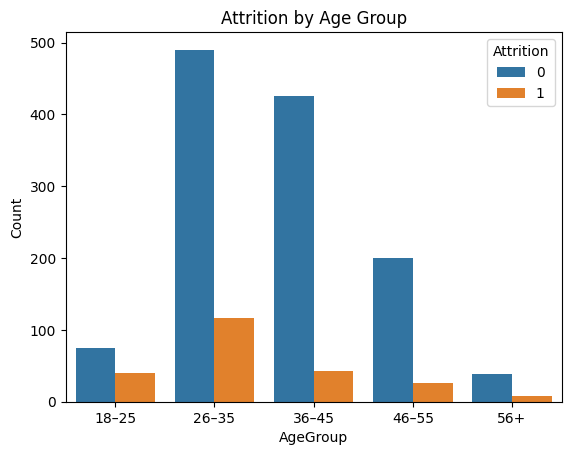

In [ ]:
# Create Age Bins
bins = [18, 25, 35, 45, 55, 65]
labels = ['18–25', '26–35', '36–45', '46–55', '56+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Plot
sns.countplot(data=df, x='AgeGroup', hue='Attrition')
plt.title("Attrition by Age Group")
plt.ylabel("Count")
plt.show()


In [ ]:
# Select features for modeling
df_model = df.copy()

# Drop target leakage or unnecessary columns
df_model.drop(['AgeGroup'], axis=1, inplace=True)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_model, drop_first=True)

# Confirm shape
print(f"Encoded dataset shape: {df_encoded.shape}")


Encoded dataset shape: (1470, 45)


In [ ]:
from sklearn.model_selection import train_test_split

# Features and Target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Re-train model with scaled data
model = LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)


# Evaluate results
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.2%}")



Confusion Matrix:
[[192  55]
 [ 18  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       247
           1       0.35      0.62      0.44        47

    accuracy                           0.75       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.82      0.75      0.78       294


Accuracy: 75.17%


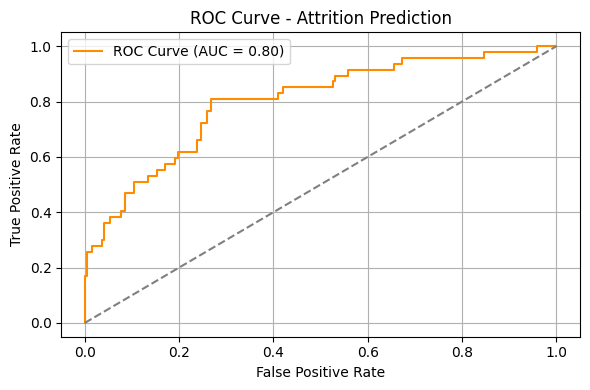

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = model.predict_proba(X_test_scaled)[:, 1]

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Attrition Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Save cleaned data (original structure)
df.to_csv("cleaned_hr_data.csv", index=False)
print("✅ Cleaned dataset exported as cleaned_hr_data.csv")


✅ Cleaned dataset exported as cleaned_hr_data.csv
